<a href="https://colab.research.google.com/github/KinzaaSheikh/ml_research_notes/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU yfinance pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 50.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


In [4]:
import yfinance as yf
import pandas as pd

# Download daily adjusted close prices
tickers = ['AAPL', 'SPY']
data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']

/tmp/ipython-input-4204230986.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']
[*********************100%***********************]  2 of 2 completed


In [5]:
# Calculate daily returns
returns = data.pct_change().dropna()
returns.head()

Ticker,AAPL,SPY
Date,,
2018-01-03,-0.000174,0.006325
2018-01-04,0.004645,0.004215
2018-01-05,0.011385,0.006664
2018-01-08,-0.003714,0.001829
2018-01-09,-0.000115,0.002264


## Run the Regression

In [6]:
import statsmodels.api as sm

X = returns['SPY']
y = returns['AAPL']

# Add constant (alpha)
X = sm.add_constant(X)

# Run regression
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     2622.
Date:                Tue, 02 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:31:55   Log-Likelihood:                 4523.8
No. Observations:                1508   AIC:                            -9044.
Df Residuals:                    1506   BIC:                            -9033.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.855      0.0

## Interpret Results

From the output:

Intercept (α): Average return unexplained by the market.

Slope (β): Apple’s sensitivity to market movements.

β > 1 → more volatile than the market

β < 1 → less volatile

## Visualize

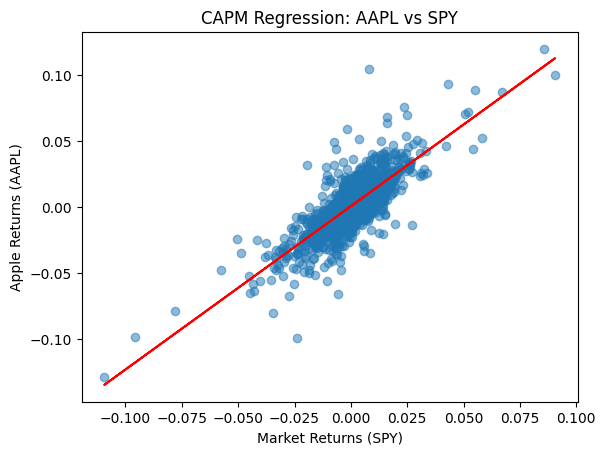

In [7]:
import matplotlib.pyplot as plt

plt.scatter(returns['SPY'], returns['AAPL'], alpha=0.5)
plt.plot(returns['SPY'], model.predict(sm.add_constant(returns['SPY'])), color='red')
plt.xlabel("Market Returns (SPY)")
plt.ylabel("Apple Returns (AAPL)")
plt.title("CAPM Regression: AAPL vs SPY")
plt.show()
